In [23]:
import random
department = ( " frozen " ,
" bakery " ,
" produce " ,
" alcohol " ,
" international " ,
" beverages " ,
" pets " ,
" dry goods pasta " ,
" bulk " ,
" personal care " ,
" meat seafood " ,
" pantry " ,
" breakfast " ,
" canned goods " ,
" dairy eggs " ,
" household " ,
" babies " ,
" snack " ,
" deli " ,
)
student_id_one = 202218932 # Replace with your student ID
student_id_two = None
seed = (student_id_one + student_id_two) // 2 if student_id_two else student_id_one
random.seed(seed)
selected_department = random.choices( department , k = 5 )
print(selected_department)

[' babies ', ' produce ', ' dairy eggs ', ' canned goods ', ' snack ']


In [ ]:
# Chose snack dpt
import pandas as pd

path = "instacart-market-basket-analysis"

# init df for each csv and make copy
df_products = pd.read_csv(f"{path}/products.csv")
df_products_origin = df_products.copy()

df_orders = pd.read_csv(f"{path}/orders.csv")
df_orders_origin = df_orders.copy()

df_aisles = pd.read_csv(f"{path}/aisles.csv")
df_aisles_origin = df_aisles.copy()

df_order_products__train = pd.read_csv(f"{path}/order_products__train.csv")
df_order_products__train_origin = df_order_products__train.copy()


# filter products to show just snack products
df_dept_products = df_products[df_products["department_id"] == 19]


np.False_

In [ ]:
# checks to see if there are in null values in products csv

"""orders had null values for the "days since prior order" column for every users first purchase so we set that to 0
since by default when you purchase a product you wouldn't have had days from prior order"""
df_orders["days_since_prior_order"]  = df_orders["days_since_prior_order"].fillna(0)


"""all other files were clear of null values"""
#df_dept_products.isna().any().any()
#df_aisles.isna().any().any()
#df_order_products__train.isna().any().any()


'all other files were clear of null values'

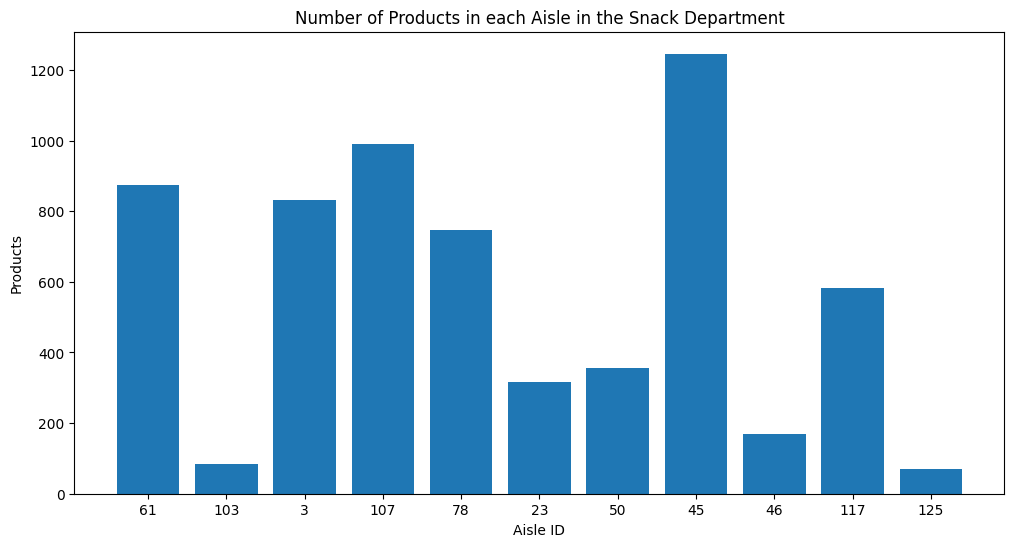

In [163]:
#  61, 103,   3, 107,  78,  23,  50,  45,  46, 117, 125
import matplotlib.pyplot as plt

# obtain the unique aisle id's in the dept and get their count of products
unique_aisles = df_dept_products["aisle_id"].unique()

# returns dictionary of aisle id's (key) and the number of products in aisle (value)
def count(data, ids):
    aisle_dict = {}
    for i in ids:
        aisle_dict[i] = data[data["aisle_id"] == i].shape[0]
    return aisle_dict
dict = count(df_dept_products, unique_aisles)

plt.figure(figsize=(12,6))
plt.bar([str(k) for k in dict.keys()], list(dict.values()))
plt.xlabel("Aisle ID")
plt.ylabel("Products")
plt.title("Number of Products in each Aisle in the Snack Department")

plt.show()




In [ ]:
""" Generalizing each aisle to smoothen data """

df_dept_products[df_dept_products["aisle_id"] == 61].tail(50) # desserts aisle
df_dept_products[df_dept_products["aisle_id"] == 103].tail(50) # Dessert Toppings aisle
df_dept_products[df_dept_products["aisle_id"] == 3].head(50) # Granola Bars aisle
df_dept_products[df_dept_products["aisle_id"] == 107].head(50) # Chips aisle
df_dept_products[df_dept_products["aisle_id"] == 78].head(50) # Crackers aisle
df_dept_products[df_dept_products["aisle_id"] == 23].head(50) # Popcorn/Jerky aisle
df_dept_products[df_dept_products["aisle_id"] == 50].head(50) # Travel Snacks aisle
df_dept_products[df_dept_products["aisle_id"] == 45].head(50) # Candy aisle
df_dept_products[df_dept_products["aisle_id"] == 46].head(50) # Gum aisle
df_dept_products[df_dept_products["aisle_id"] == 117].head(50) # Travel Snack aisle
df_dept_products[df_dept_products["aisle_id"] == 125].head(50) # Trail Mix aisle




,product_id,product_name,aisle_id,department_id
247,248,Dried Sweetened Cranberries,117,19
303,304,Dry Roasted Pistachios,117,19
354,355,Ground Flaxseed With Mixed Berries,117,19
589,590,Almonds Roasted and Salted,117,19
618,619,Spanish Peanuts,117,19
774,775,Organic Dried Cranberries,117,19
839,840,Coco Joe Pumpkin Seeds,117,19
1020,1021,Ready to Eat Organic Flax Chia Blend,117,19
1191,1192,100% Organic Simple Seed Mix,117,19
1263,1264,Pitted Prunes with Orange Essence,117,19
